<a href="https://colab.research.google.com/github/Vahe-P/My-First-GAN_s/blob/main/My_first_Gan_s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!cp "/content/drive/MyDrive/img_align_celeba.zip" /content/


In [ ]:
!unzip -q /content/img_align_celeba.zip -d /content/unzipped_folder/
!ls /content/unzipped_folder/

img_align_celeba


In [ ]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/watch?v=8L11aMN5KY8" frameborder="0" allowfullscreen></iframe>')

/usr/local/lib/python3.11/dist-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [ ]:
# Imports

import numpy as np
from numpy import random
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
# Drawing function

def view_samples(samples, m, n):
    fig, axes = plt.subplots(figsize=(10, 10), nrows=m, ncols=n, sharey=True, sharex=True)
    for ax, img in zip(axes.flatten(), samples):
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        im = ax.imshow(1-img.reshape((4,4)), cmap='Greys_r')
    return fig, axes

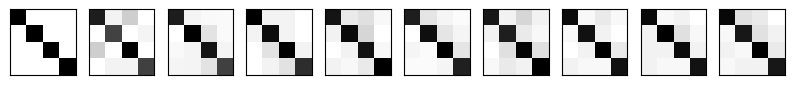

In [ ]:
faces = [
    np.array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]),
    np.array([0.9, 0.1, 0.3, 0, 0, 0.79, 0, 0.09, 0.3, 0, 1, 0, 0, 0.1, 0.1, 0.8]),
    np.array([0.9, 0.1, 0.06, 0.05, 0.01, 1, 0.2, 0.05, 0.06, 0.1, 0.93, 0.1, 0.09, 0.1, 0.2, 0.8]),
    np.array([1, 0.1, 0.1, 0, 0.1, 0.95, 0.1, 0, 0, 0.2, 1, 0.1, 0, 0.1, 0.2, 0.85]),
    np.array([0.88, 0.15, 0.2, 0.05, 0.1, 0.92, 0.25, 0, 0, 0.1, 0.89, 0.05, 0.1, 0.05, 0.15, 0.95]),
    np.array([0.9, 0.2, 0.1, 0.05, 0.02, 0.95, 0.2, 0.1, 0.1, 0.05, 1, 0.2, 0.05, 0.05, 0.1, 0.89]),
    np.array([0.87, 0.1, 0.25, 0.1, 0.1, 0.85, 0.15, 0.05, 0, 0.2, 0.93, 0.2, 0.05, 0.15, 0.1, 0.95]),
    np.array([0.92, 0.05, 0.15, 0.05, 0.05, 0.9, 0.1, 0, 0, 0.1, 0.96, 0.15, 0.1, 0.05, 0.05, 0.9]),
    np.array([0.91, 0.05, 0.1, 0, 0.1, 0.94, 0.2, 0.05, 0.1, 0.1, 0.9, 0.1, 0.1, 0.05, 0.05, 0.88]),
    np.array([0.95, 0.2, 0.15, 0, 0.05, 0.9, 0.2, 0.1, 0.1, 0.05, 0.98, 0.15, 0.05, 0.1, 0.1, 0.9])
]


_ = view_samples(faces, 1, 10)

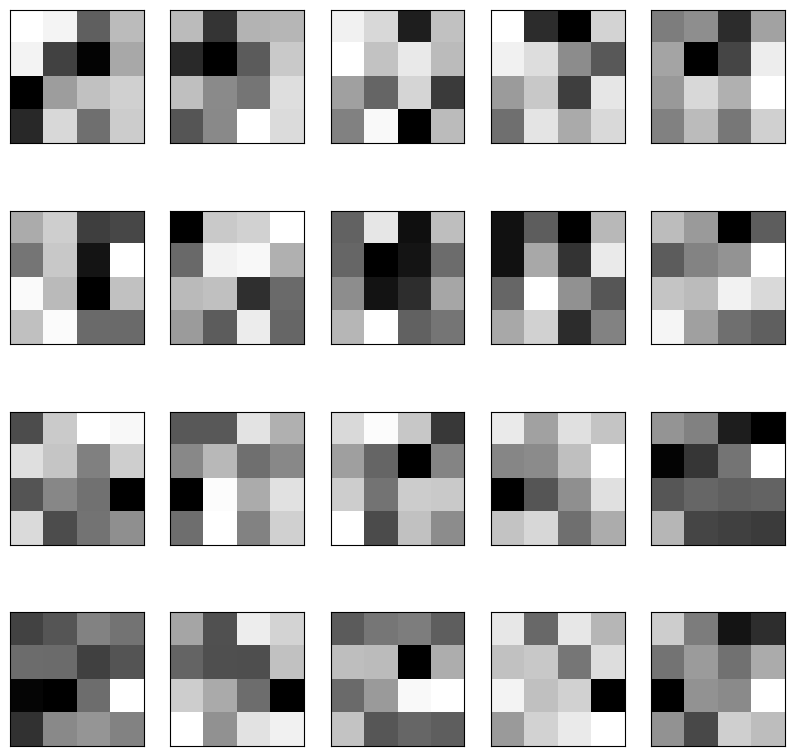

In [ ]:
# Examples of noisy images
noise = [np.random.randn(4,4) for i in range(20)]
def generate_random_image():
    return [np.random.random(), np.random.random(), np.random.random(), np.random.random()]

_ = view_samples(noise, 4,5)

In [ ]:
# The sigmoid activation function
def sigmoid(x):
    return np.exp(x)/(1.0+np.exp(x))

In [ ]:
class Discriminator():
    def __init__(self):

        self.weights = np.array([np.random.normal() for i in range(16)])
        self.bias = np.random.normal()

    def forward(self, x):
        # Forward pass
        return sigmoid(np.dot(x, self.weights) + self.bias)

    def error_from_image(self, image):
        prediction = self.forward(image)
        return -np.log(prediction)

    def derivatives_from_image(self, image):
        prediction = self.forward(image)
        derivatives_weights = -image * (1-prediction)
        derivative_bias = -(1-prediction)
        return derivatives_weights, derivative_bias

    def update_from_image(self, x):
        ders = self.derivatives_from_image(x)
        self.weights -= learning_rate * ders[0]
        self.bias -= learning_rate * ders[1]

    def error_from_noise(self, noise):
        prediction = self.forward(noise)
        # We want the prediction to be 0, so the error is -log(1-prediction)
        return -np.log(1-prediction)

    def derivatives_from_noise(self, noise):
        prediction = self.forward(noise)
        derivatives_weights = noise * prediction
        derivative_bias = prediction
        return derivatives_weights, derivative_bias

    def update_from_noise(self, noise):
        ders = self.derivatives_from_noise(noise)
        self.weights -= learning_rate * ders[0]
        self.bias -= learning_rate * ders[1]

In [ ]:
class Generator():
    def __init__(self):
        self.weights = np.array([np.random.normal() for i in range(16)])
        self.biases = np.array([np.random.normal() for i in range(16)])

    def forward(self, z):
        # Forward pass
        return sigmoid(z * self.weights + self.biases)

    def error(self, z, discriminator):
        x = self.forward(z)
        # We want the prediction to be 0, so the error is -log(1-prediction)
        y = discriminator.forward(x)
        return -np.log(y)

    def derivatives(self, z, discriminator):
        discriminator_weights = discriminator.weights
        discriminator_bias = discriminator.bias
        x = self.forward(z)
        y = discriminator.forward(x)
        factor = -(1-y) * discriminator_weights * x *(1-x)
        derivatives_weights = factor * z
        derivative_bias = factor
        return derivatives_weights, derivative_bias

    def update(self, z, discriminator):
        error_before = self.error(z, discriminator)
        ders = self.derivatives(z, discriminator)
        self.weights -= learning_rate * ders[0]
        self.biases -= learning_rate * ders[1]
        error_after = self.error(z, discriminator)

In [ ]:
# Set random seed
np.random.seed(42)

# Hyperparameters
learning_rate = 0.01
epochs = 1000

# The GAN
D = Discriminator()
G = Generator()

# For the error plot
errors_discriminator = []
errors_generator = []

for epoch in range(epochs):

    for face in faces:

        # Update the discriminator weights from the real face
        D.update_from_image(face)

        # Pick a random number to generate a fake face
        z = random.rand()

        # Calculate the discriminator error
        errors_discriminator.append(sum(D.error_from_image(face) + D.error_from_noise(z)))

        # Calculate the generator error
        errors_generator.append(G.error(z, D))

        # Build a fake face
        noise = G.forward(z)

        # Update the discriminator weights from the fake face
        D.update_from_noise(noise)

        # Update the generator weights from the fake face
        G.update(z, D)

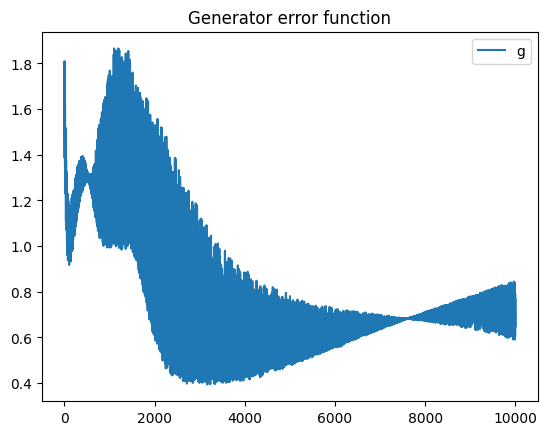

Text(0.5, 1.0, 'Discriminator error function')

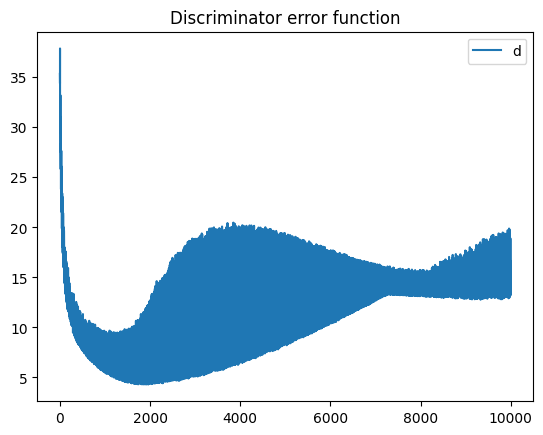

In [ ]:
import matplotlib.pyplot as plt
plt.plot(errors_generator)
plt.title("Generator error function")
plt.legend("gen")
plt.show()
plt.plot(errors_discriminator)
plt.legend('disc')
plt.title("Discriminator error function")

[0.97102846 0.06884616 0.11826254 0.00754604 0.0302076  0.97625066
 0.05567705 0.00827209 0.0173003  0.03069554 0.98762502 0.19585263
 0.01776461 0.01024067 0.01291033 0.95196774]
[0.97435565 0.06104494 0.10898252 0.00720892 0.02882296 0.97892695
 0.0488415  0.00712329 0.01577215 0.02693319 0.98907729 0.19111726
 0.01624255 0.00904525 0.01246464 0.95471282]
[0.96076044 0.09257886 0.1445298  0.0084603  0.03396285 0.96801429
 0.07692515 0.01201747 0.02179275 0.04247762 0.98309995 0.20809636
 0.02221608 0.01396297 0.01409638 0.94438625]
[0.97993069 0.04786206 0.09232545 0.00657886 0.02623594 0.9834238
 0.03748832 0.00527964 0.01310348 0.0207067  0.99149489 0.18190947
 0.01357309 0.00705378 0.0116183  0.95976109]


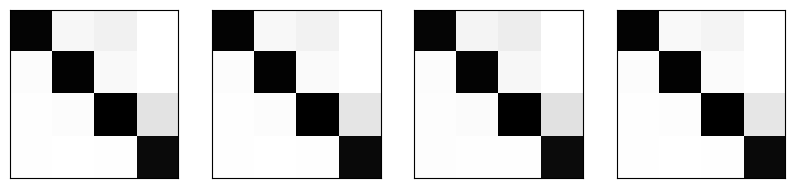

In [ ]:

generated_images = []
for i in range(4):
    z = random.random()
    generated_image = G.forward(z)
    generated_images.append(generated_image)
_ = view_samples(generated_images, 1, 4)
for i in generated_images:
    print(i)

**Part 2**

In [ ]:
import numpy as np

def generate_lower_triangular_matrix():
    mat = np.zeros((4, 4))
    for i in range(4):
        for j in range(i + 1):  # only lower triangle and diagonal
            if i == j:
                mat[i, j] = np.random.uniform(0.5, 0.8)  # diagonal
            else:
                mat[i, j] = np.random.uniform(0.8, 1.0)  # strictly lower
    return mat

matrices = [generate_lower_triangular_matrix() for _ in range(100)]
print(np.array(matrices).shape)
a=[]
for i in range(len(matrices)):
  a.append([])
  for j in matrices[i]:
    for k in j:
      a[i].append(k)
matrices=np.array(a)

(100, 4, 4)


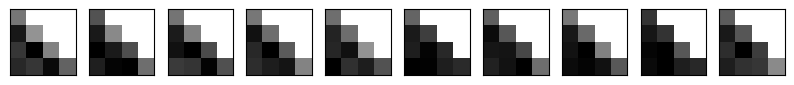

In [ ]:
_ = view_samples(matrices, 1, 10)

In [ ]:
def sigmoid(x):
    return np.exp(x)/(1.0+np.exp(x))

In [ ]:
class Discriminator():
    def __init__(self):

        self.weights = np.array([np.random.normal() for i in range(16)])
        self.bias = np.random.normal()

    def forward(self, x):
        # Forward pass
        return sigmoid(np.dot(x, self.weights) + self.bias)

    def error_from_image(self, image):
        prediction = self.forward(image)
        return -np.log(prediction)

    def derivatives_from_image(self, image):
        prediction = self.forward(image)
        derivatives_weights = -image * (1-prediction)
        derivative_bias = -(1-prediction)
        return derivatives_weights, derivative_bias

    def update_from_image(self, x):
        ders = self.derivatives_from_image(x)
        self.weights -= learning_rate * ders[0]
        self.bias -= learning_rate * ders[1]

    def error_from_noise(self, noise):
        prediction = self.forward(noise)
        return -np.log(1-prediction)

    def derivatives_from_noise(self, noise):
        prediction = self.forward(noise)
        derivatives_weights = noise * prediction
        derivative_bias = prediction
        return derivatives_weights, derivative_bias

    def update_from_noise(self, noise):
        ders = self.derivatives_from_noise(noise)
        self.weights -= learning_rate * ders[0]
        self.bias -= learning_rate * ders[1]

In [ ]:
class Generator():
    def __init__(self):
        self.weights = np.array([np.random.normal() for i in range(16)])
        self.biases = np.array([np.random.normal() for i in range(16)])

    def forward(self, z):
        # Forward pass
        return sigmoid(z * self.weights + self.biases)

    def error(self, z, discriminator):
        x = self.forward(z)
        y = discriminator.forward(x)
        return -np.log(y)

    def derivatives(self, z, discriminator):
        discriminator_weights = discriminator.weights
        discriminator_bias = discriminator.bias
        x = self.forward(z)
        y = discriminator.forward(x)
        factor = -(1-y) * discriminator_weights * x *(1-x)
        derivatives_weights = factor * z
        derivative_bias = factor
        return derivatives_weights, derivative_bias

    def update(self, z, discriminator):
        error_before = self.error(z, discriminator)
        ders = self.derivatives(z, discriminator)
        self.weights -= learning_rate * ders[0]
        self.biases -= learning_rate * ders[1]
        error_after = self.error(z, discriminator)

In [ ]:
np.random.seed(42)

learning_rate = 0.01
epochs = 1000

D = Discriminator()
G = Generator()

# For the error plot
errors_discriminator = []
errors_generator = []

for epoch in range(epochs):

    for i in matrices:

        D.update_from_image(i)

        z = random.rand()
        errors_discriminator.append(sum(D.error_from_image(i) + D.error_from_noise(z)))
        errors_generator.append(G.error(z, D))
        noise = G.forward(z)
        D.update_from_noise(noise)
        G.update(z, D)

[6.36902110e-01 4.42878297e-04 5.53530858e-04 4.72830463e-04
 8.54635018e-01 6.24750004e-01 4.25933778e-04 4.62856636e-04
 7.02942286e-01 8.28175657e-01 6.34332571e-01 6.18818423e-04
 8.06777489e-01 9.41827497e-01 8.52496113e-01 5.40751534e-01]
[6.75222811e-01 2.28525205e-04 3.04614573e-04 3.38325602e-04
 8.81039768e-01 6.58528147e-01 2.15238507e-04 2.52099956e-04
 7.14067580e-01 8.20039650e-01 6.63602452e-01 3.84435247e-04
 8.23874632e-01 9.49050365e-01 8.88992579e-01 5.36613379e-01]
[7.28085598e-01 8.53226884e-05 1.25169545e-04 2.05534576e-04
 9.12619462e-01 7.05901921e-01 7.79012691e-05 1.02013884e-04
 7.30158476e-01 8.07374999e-01 7.04902659e-01 1.89222107e-04
 8.47091567e-01 9.58248406e-01 9.28647004e-01 5.30443512e-01]
[0.54434745 0.00197334 0.0021325  0.00100722 0.77723995 0.54428306
 0.0019895  0.00182549 0.67690858 0.84548423 0.564726   0.00181334
 0.76358699 0.92183487 0.73442614 0.55008167]


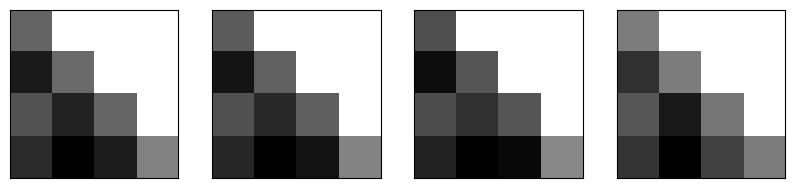

In [ ]:

generated_images = []
for i in range(4):
    z = random.random()
    generated_image = G.forward(z)
    generated_images.append(generated_image)
_ = view_samples(generated_images, 1, 4)
for i in generated_images:
    print(i)

In [ ]:

def relu(x):
    return np.maximum(0, x)

In [ ]:
from PIL import Image
import os
import numpy as np

# Folder with images
image_folder = "/content/unzipped_folder/img_align_celeba/"

# Get first 1000 image filenames
image_files = sorted([
    f for f in os.listdir(image_folder)
    if f.lower().endswith(('.jpg', '.jpeg', '.png'))
])[:1000]

# List to hold resized image arrays
resized_images = []

for file_name in image_files:
    image_path = os.path.join(image_folder, file_name)
    try:
        img = Image.open(image_path).convert("RGB")  # Ensure 3 channels
        img_resized = img.resize((32, 32))
        img_array = np.array(img_resized) / 255.0    # Normalize to [0, 1]
        resized_images.append(img_array)
    except Exception as e:
        print(f"Skipping {file_name}: {e}")

# Convert to NumPy array
resized_images_np = np.array(resized_images)

print("Loaded and resized:", resized_images_np.shape)

Loaded and resized: (1000, 32, 32, 3)


In [ ]:
imagess=[]
for i in range(len(resized_images_np)):
  imagess.append([])
  for j in resized_images_np[i]:
    for k in j:
      for t in k:
          imagess[i].append(t)
imagess=np.array(imagess)

In [ ]:
imagess*=255

In [ ]:
imagess[0]

array([253., 231., 194., ..., 106.,  41.,  17.])

In [ ]:
class Discriminator():
    def __init__(self):

        self.weights = np.array([np.random.normal() for i in range(32*32*3)])
        self.bias = np.random.normal()

    def forward(self, x):
        # Forward pass
        return sigmoid(np.dot(x, self.weights) + self.bias)

    def error_from_image(self, image):
        prediction = self.forward(image)
        return -np.log(prediction)

    def derivatives_from_image(self, image):
        prediction = self.forward(image)
        derivatives_weights = -image * (1-prediction)
        derivative_bias = -(1-prediction)
        return derivatives_weights, derivative_bias

    def update_from_image(self, x):
        ders = self.derivatives_from_image(x)
        self.weights -= learning_rate * ders[0]
        self.bias -= learning_rate * ders[1]

    def error_from_noise(self, noise):
        prediction = self.forward(noise)
        return -np.log(1-prediction)

    def derivatives_from_noise(self, noise):
        prediction = self.forward(noise)
        derivatives_weights = noise * prediction
        derivative_bias = prediction
        return derivatives_weights, derivative_bias

    def update_from_noise(self, noise):
        ders = self.derivatives_from_noise(noise)
        self.weights -= learning_rate * ders[0]
        self.bias -= learning_rate * ders[1]

In [ ]:
class Generator():
    def __init__(self):
        self.weights = np.array([np.random.normal() for i in range(32*32*3)])
        self.biases = np.array([np.random.normal() for i in range(32*32*3)])

    def forward(self, z):
        # Forward pass
        return sigmoid(z * self.weights + self.biases)

    def error(self, z, discriminator):
        x = self.forward(z)
        y = discriminator.forward(x)
        return -np.log(y)

    def derivatives(self, z, discriminator):
        discriminator_weights = discriminator.weights
        discriminator_bias = discriminator.bias
        x = self.forward(z)
        y = discriminator.forward(x)
        factor = -(1-y) * discriminator_weights * x *(1-x)
        derivatives_weights = factor * z
        derivative_bias = factor
        return derivatives_weights, derivative_bias

    def update(self, z, discriminator):
        error_before = self.error(z, discriminator)
        ders = self.derivatives(z, discriminator)
        self.weights -= learning_rate * ders[0]
        self.biases -= learning_rate * ders[1]
        error_after = self.error(z, discriminator)

In [ ]:
np.random.seed(42)

learning_rate = 0.005
epochs = 1500

D = Discriminator()
G = Generator()

# For the error plot
errors_discriminator = []
errors_generator = []

for epoch in range(epochs):

    for i in imagess:

        D.update_from_image(i)

        z = random.rand()
        errors_discriminator.append(sum(D.error_from_image(i) + D.error_from_noise(z)))
        errors_generator.append(G.error(z, D))
        noise = G.forward(z)
        D.update_from_noise(noise)
        G.update(z, D)

KeyboardInterrupt: 

In [ ]:
generated_images = []
for i in range(5):
    z = random.random()
    generated_image = G.forward(z)
    generated_images.append(generated_image)
generated_images=np.array(generated_images)

1
1
1
1
1


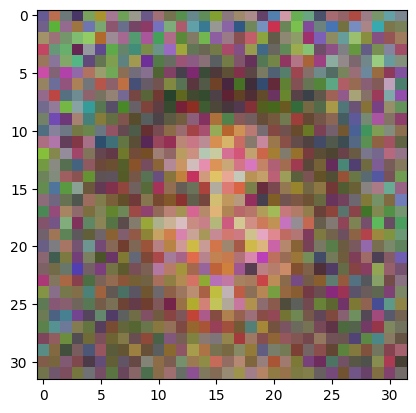

In [ ]:

for i in generated_images:
  print(1)
  plt.imshow(i.reshape( 32, 32, 3))

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
class Generator(nn.Module):
    def __init__(self, latent_dim):
        super(Generator, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(latent_dim, 128 * 8 * 8),
            nn.ReLU(),
            nn.Unflatten(1, (128, 8, 8)),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128, momentum=0.78),
            nn.ReLU(),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(128, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64, momentum=0.78),
            nn.ReLU(),
            nn.Conv2d(64, 3, kernel_size=3, padding=1),
            nn.Tanh()
        )

    def forward(self, z):
        img = self.model(z)
        return img

In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        self.model = nn.Sequential(
        nn.Conv2d(3, 32, kernel_size=3, stride=2, padding=1),
        nn.LeakyReLU(0.2),
        nn.Dropout(0.25),
        nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
        nn.ZeroPad2d((0, 1, 0, 1)),
        nn.BatchNorm2d(64, momentum=0.82),
        nn.LeakyReLU(0.25),
        nn.Dropout(0.25),
        nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
        nn.BatchNorm2d(128, momentum=0.82),
        nn.LeakyReLU(0.2),
        nn.Dropout(0.25),
        nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(256, momentum=0.8),
        nn.LeakyReLU(0.25),
        nn.Dropout(0.25),
        nn.Flatten(),
        nn.Linear(256 * 5 * 5, 1),
        nn.Sigmoid()
    )

    def forward(self, img):
        validity = self.model(img)
        return validity

In [ ]:
imagess = imagess.reshape(-1, 3, 32, 32).astype(np.float32)
imagess = (imagess / 127.5) - 1.0
imagess_tensor = torch.tensor(imagess)

In [ ]:
imagess[0]

array([[[ 0.9843137 ,  0.8117647 ,  0.52156866, ...,  0.56078434,
          0.99215686,  0.8509804 ],
        [ 0.56078434,  0.99215686,  0.85882354, ..., -0.73333335,
         -0.75686276, -0.29411763],
        [-0.60784316, -0.67058825, -0.5686275 , ...,  0.96862745,
          0.84313726,  0.64705884],
        ...,
        [-0.2235294 , -0.47450978,  0.3803922 , ...,  0.39607847,
          0.09803927, -0.1372549 ],
        [ 0.99215686,  0.88235295,  0.654902  , ..., -0.6313726 ,
         -0.44313723, -0.7490196 ],
        [-0.7647059 , -0.32549018, -0.6156863 , ...,  0.15294123,
         -0.12156862,  0.41960788]],

       [[-0.08235294, -0.35686272,  0.47450984, ...,  0.34901965,
          0.00392163, -0.2235294 ],
        [ 0.9843137 ,  0.88235295,  0.6627451 , ..., -0.8745098 ,
         -0.8039216 , -0.9607843 ],
        [-0.96862745,  0.2313726 , -0.2235294 , ...,  0.58431375,
          0.28627455,  0.8352941 ],
        ...,
        [-0.4823529 ,  0.94509804,  0.427451  , ...,  

In [ ]:
generator = Generator(100).to(device)
discriminator = Discriminator().to(device)

adversarial_loss = nn.BCELoss()

optimizer_G = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

In [ ]:
latent_dim = 100
batch_size = 64
num_epochs = 100

In [ ]:

import torchvision

In [ ]:

image_folder = "/content/unzipped_folder/img_align_celeba/"

image_files = sorted([
    f for f in os.listdir(image_folder)
    if f.lower().endswith(('.jpg', '.jpeg', '.png'))
])[:10000]

resized_images = []

for file_name in image_files:
    image_path = os.path.join(image_folder, file_name)
    try:
        img = Image.open(image_path).convert("RGB")
        img_resized = img.resize((32, 32))
        img_array = np.array(img_resized).astype(np.float32)  # [0, 255]
        resized_images.append(img_array)
    except Exception as e:
        print(f"Skipping {file_name}: {e}")

resized_images_np = np.array(resized_images)  # shape: (1000, 32, 32, 3)

# Convert to [0,1] → [-1,1], then to (N, 3, 32, 32)
imagess = (resized_images_np / 127.5) - 1.0
imagess = np.transpose(imagess, (0, 3, 1, 2))  # to (N, C, H, W)
imagess_tensor = torch.tensor(imagess, dtype=torch.float32)


Epoch [1/100], Batch 10/156, D Loss: 0.1941, G Loss: 2.9008
Epoch [1/100], Batch 20/156, D Loss: 0.2392, G Loss: 3.4455
Epoch [1/100], Batch 30/156, D Loss: 0.2680, G Loss: 2.9015
Epoch [1/100], Batch 40/156, D Loss: 0.5306, G Loss: 2.5717
Epoch [1/100], Batch 50/156, D Loss: 0.4658, G Loss: 3.0277
Epoch [1/100], Batch 60/156, D Loss: 0.5742, G Loss: 2.0268
Epoch [1/100], Batch 70/156, D Loss: 0.5872, G Loss: 2.2499
Epoch [1/100], Batch 80/156, D Loss: 0.5661, G Loss: 1.9533
Epoch [1/100], Batch 90/156, D Loss: 0.8170, G Loss: 1.8101
Epoch [1/100], Batch 100/156, D Loss: 0.6421, G Loss: 2.1275
Epoch [1/100], Batch 110/156, D Loss: 0.5979, G Loss: 2.0235
Epoch [1/100], Batch 120/156, D Loss: 0.6454, G Loss: 1.8082
Epoch [1/100], Batch 130/156, D Loss: 0.6342, G Loss: 1.9095
Epoch [1/100], Batch 140/156, D Loss: 0.5107, G Loss: 2.0755
Epoch [1/100], Batch 150/156, D Loss: 0.5125, G Loss: 2.2040
Epoch [2/100], Batch 10/156, D Loss: 0.6604, G Loss: 1.3315
Epoch [2/100], Batch 20/156, D Los

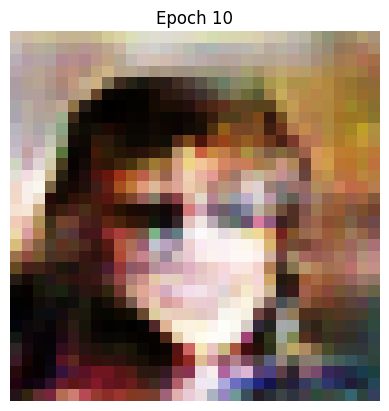

Epoch [11/100], Batch 10/156, D Loss: 0.5309, G Loss: 0.9992
Epoch [11/100], Batch 20/156, D Loss: 0.5866, G Loss: 1.0179
Epoch [11/100], Batch 30/156, D Loss: 0.5603, G Loss: 1.5345
Epoch [11/100], Batch 40/156, D Loss: 0.4851, G Loss: 1.4723
Epoch [11/100], Batch 50/156, D Loss: 0.6514, G Loss: 1.8470
Epoch [11/100], Batch 60/156, D Loss: 0.5414, G Loss: 1.2206
Epoch [11/100], Batch 70/156, D Loss: 0.5025, G Loss: 1.1841
Epoch [11/100], Batch 80/156, D Loss: 0.4495, G Loss: 1.1368
Epoch [11/100], Batch 90/156, D Loss: 0.4461, G Loss: 1.6063
Epoch [11/100], Batch 100/156, D Loss: 0.5049, G Loss: 1.6643
Epoch [11/100], Batch 110/156, D Loss: 0.4871, G Loss: 1.6411
Epoch [11/100], Batch 120/156, D Loss: 0.4259, G Loss: 1.6850
Epoch [11/100], Batch 130/156, D Loss: 0.4612, G Loss: 1.2989
Epoch [11/100], Batch 140/156, D Loss: 0.4892, G Loss: 0.9882
Epoch [11/100], Batch 150/156, D Loss: 0.5943, G Loss: 0.9640
Epoch [12/100], Batch 10/156, D Loss: 0.4556, G Loss: 1.7852
Epoch [12/100], Ba

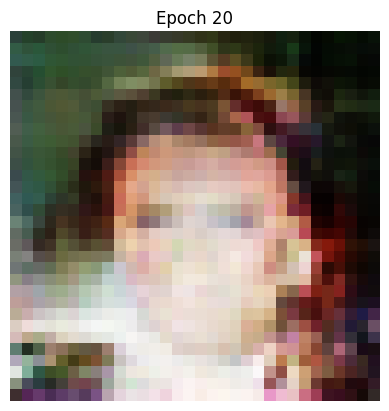

Epoch [21/100], Batch 10/156, D Loss: 0.5227, G Loss: 1.2447
Epoch [21/100], Batch 20/156, D Loss: 0.6641, G Loss: 0.9753
Epoch [21/100], Batch 30/156, D Loss: 0.5810, G Loss: 0.9304
Epoch [21/100], Batch 40/156, D Loss: 0.5239, G Loss: 1.8062
Epoch [21/100], Batch 50/156, D Loss: 0.5239, G Loss: 1.4718
Epoch [21/100], Batch 60/156, D Loss: 0.5061, G Loss: 1.7161
Epoch [21/100], Batch 70/156, D Loss: 0.5596, G Loss: 1.2846
Epoch [21/100], Batch 80/156, D Loss: 0.5371, G Loss: 1.5882
Epoch [21/100], Batch 90/156, D Loss: 0.4982, G Loss: 1.5026
Epoch [21/100], Batch 100/156, D Loss: 0.5009, G Loss: 1.7992
Epoch [21/100], Batch 110/156, D Loss: 0.6661, G Loss: 1.0729
Epoch [21/100], Batch 120/156, D Loss: 0.3674, G Loss: 1.1799
Epoch [21/100], Batch 130/156, D Loss: 0.5978, G Loss: 1.0790
Epoch [21/100], Batch 140/156, D Loss: 0.4734, G Loss: 1.2416
Epoch [21/100], Batch 150/156, D Loss: 0.5011, G Loss: 1.8302
Epoch [22/100], Batch 10/156, D Loss: 0.5538, G Loss: 1.2645
Epoch [22/100], Ba

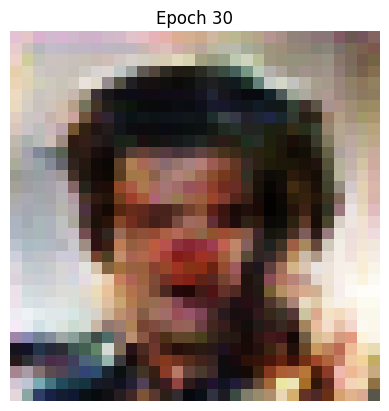

Epoch [31/100], Batch 10/156, D Loss: 0.4965, G Loss: 0.9358
Epoch [31/100], Batch 20/156, D Loss: 0.5991, G Loss: 1.1168
Epoch [31/100], Batch 30/156, D Loss: 0.5469, G Loss: 1.0483
Epoch [31/100], Batch 40/156, D Loss: 0.7506, G Loss: 1.0716
Epoch [31/100], Batch 50/156, D Loss: 0.5223, G Loss: 1.0986
Epoch [31/100], Batch 60/156, D Loss: 0.8226, G Loss: 0.9461
Epoch [31/100], Batch 70/156, D Loss: 0.5679, G Loss: 1.4804
Epoch [31/100], Batch 80/156, D Loss: 0.4488, G Loss: 1.5619
Epoch [31/100], Batch 90/156, D Loss: 0.6044, G Loss: 1.3501
Epoch [31/100], Batch 100/156, D Loss: 0.5242, G Loss: 1.0684
Epoch [31/100], Batch 110/156, D Loss: 0.5449, G Loss: 1.2361
Epoch [31/100], Batch 120/156, D Loss: 0.5718, G Loss: 1.2896
Epoch [31/100], Batch 130/156, D Loss: 0.6426, G Loss: 1.5685
Epoch [31/100], Batch 140/156, D Loss: 0.4725, G Loss: 1.3692
Epoch [31/100], Batch 150/156, D Loss: 0.6472, G Loss: 1.1426
Epoch [32/100], Batch 10/156, D Loss: 0.3949, G Loss: 1.5680
Epoch [32/100], Ba

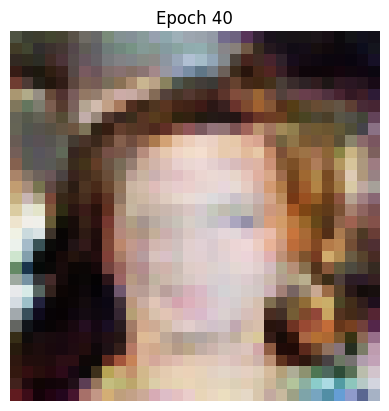

Epoch [41/100], Batch 10/156, D Loss: 0.5381, G Loss: 1.0597
Epoch [41/100], Batch 20/156, D Loss: 0.6531, G Loss: 1.1118
Epoch [41/100], Batch 30/156, D Loss: 0.5354, G Loss: 1.1859
Epoch [41/100], Batch 40/156, D Loss: 0.7038, G Loss: 1.1649
Epoch [41/100], Batch 50/156, D Loss: 0.6868, G Loss: 1.3869
Epoch [41/100], Batch 60/156, D Loss: 0.5034, G Loss: 1.3083
Epoch [41/100], Batch 70/156, D Loss: 0.4902, G Loss: 1.8437
Epoch [41/100], Batch 80/156, D Loss: 0.5564, G Loss: 1.2228
Epoch [41/100], Batch 90/156, D Loss: 0.4496, G Loss: 2.0317
Epoch [41/100], Batch 100/156, D Loss: 0.4963, G Loss: 1.6895
Epoch [41/100], Batch 110/156, D Loss: 0.5289, G Loss: 0.9228
Epoch [41/100], Batch 120/156, D Loss: 0.4580, G Loss: 1.5381
Epoch [41/100], Batch 130/156, D Loss: 0.5633, G Loss: 1.9085
Epoch [41/100], Batch 140/156, D Loss: 0.4380, G Loss: 0.9427
Epoch [41/100], Batch 150/156, D Loss: 0.6472, G Loss: 1.2790
Epoch [42/100], Batch 10/156, D Loss: 0.5573, G Loss: 1.2873
Epoch [42/100], Ba

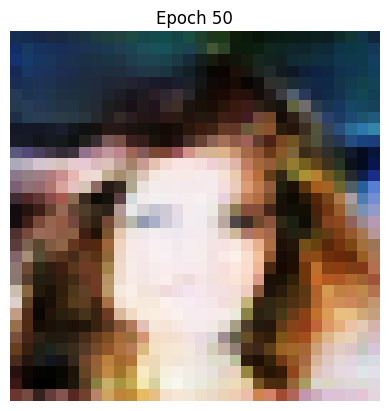

Epoch [51/100], Batch 10/156, D Loss: 0.6278, G Loss: 1.0160
Epoch [51/100], Batch 20/156, D Loss: 0.4298, G Loss: 1.7718
Epoch [51/100], Batch 30/156, D Loss: 0.5581, G Loss: 1.0160
Epoch [51/100], Batch 40/156, D Loss: 0.4914, G Loss: 1.2142
Epoch [51/100], Batch 50/156, D Loss: 0.3968, G Loss: 1.1382
Epoch [51/100], Batch 60/156, D Loss: 0.5738, G Loss: 0.6777
Epoch [51/100], Batch 70/156, D Loss: 0.6409, G Loss: 1.2812
Epoch [51/100], Batch 80/156, D Loss: 0.5364, G Loss: 0.9768
Epoch [51/100], Batch 90/156, D Loss: 0.6042, G Loss: 1.0323
Epoch [51/100], Batch 100/156, D Loss: 0.4839, G Loss: 0.8248
Epoch [51/100], Batch 110/156, D Loss: 0.5238, G Loss: 1.5027
Epoch [51/100], Batch 120/156, D Loss: 0.5583, G Loss: 1.3079
Epoch [51/100], Batch 130/156, D Loss: 0.5874, G Loss: 1.3300
Epoch [51/100], Batch 140/156, D Loss: 0.5651, G Loss: 1.0198
Epoch [51/100], Batch 150/156, D Loss: 0.6605, G Loss: 1.9271
Epoch [52/100], Batch 10/156, D Loss: 0.8388, G Loss: 0.7862
Epoch [52/100], Ba

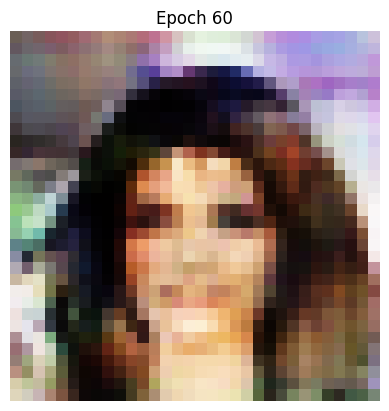

Epoch [61/100], Batch 10/156, D Loss: 0.5221, G Loss: 1.2458
Epoch [61/100], Batch 20/156, D Loss: 0.5395, G Loss: 1.4001
Epoch [61/100], Batch 30/156, D Loss: 0.4472, G Loss: 1.4325
Epoch [61/100], Batch 40/156, D Loss: 0.4687, G Loss: 1.4580
Epoch [61/100], Batch 50/156, D Loss: 0.5881, G Loss: 1.7056
Epoch [61/100], Batch 60/156, D Loss: 0.7522, G Loss: 0.7329
Epoch [61/100], Batch 70/156, D Loss: 0.5499, G Loss: 1.1292
Epoch [61/100], Batch 80/156, D Loss: 0.4748, G Loss: 1.5297
Epoch [61/100], Batch 90/156, D Loss: 0.6552, G Loss: 1.3529
Epoch [61/100], Batch 100/156, D Loss: 0.6280, G Loss: 2.4666
Epoch [61/100], Batch 110/156, D Loss: 0.5700, G Loss: 1.1253
Epoch [61/100], Batch 120/156, D Loss: 0.7130, G Loss: 0.8961
Epoch [61/100], Batch 130/156, D Loss: 0.5106, G Loss: 1.0138
Epoch [61/100], Batch 140/156, D Loss: 0.4993, G Loss: 1.2756
Epoch [61/100], Batch 150/156, D Loss: 0.4488, G Loss: 1.3921
Epoch [62/100], Batch 10/156, D Loss: 0.5264, G Loss: 1.1623
Epoch [62/100], Ba

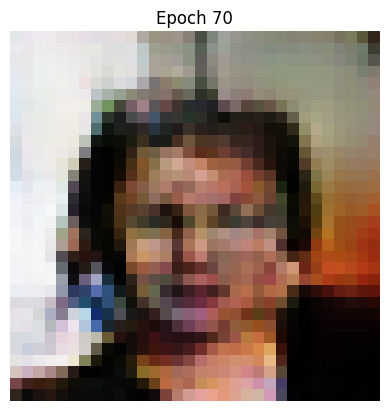

Epoch [71/100], Batch 10/156, D Loss: 0.4801, G Loss: 1.1573
Epoch [71/100], Batch 20/156, D Loss: 0.4779, G Loss: 1.5881
Epoch [71/100], Batch 30/156, D Loss: 0.7263, G Loss: 0.6638
Epoch [71/100], Batch 40/156, D Loss: 0.3890, G Loss: 1.2158
Epoch [71/100], Batch 50/156, D Loss: 0.4572, G Loss: 1.0497
Epoch [71/100], Batch 60/156, D Loss: 0.5695, G Loss: 1.4036
Epoch [71/100], Batch 70/156, D Loss: 0.4685, G Loss: 2.0018
Epoch [71/100], Batch 80/156, D Loss: 0.5600, G Loss: 1.1720
Epoch [71/100], Batch 90/156, D Loss: 0.6683, G Loss: 1.0353
Epoch [71/100], Batch 100/156, D Loss: 0.5396, G Loss: 1.2465
Epoch [71/100], Batch 110/156, D Loss: 0.6839, G Loss: 1.9446
Epoch [71/100], Batch 120/156, D Loss: 0.5822, G Loss: 1.1135
Epoch [71/100], Batch 130/156, D Loss: 0.5495, G Loss: 1.4460
Epoch [71/100], Batch 140/156, D Loss: 0.5453, G Loss: 0.7652
Epoch [71/100], Batch 150/156, D Loss: 0.4649, G Loss: 1.1097
Epoch [72/100], Batch 10/156, D Loss: 0.4864, G Loss: 1.0798
Epoch [72/100], Ba

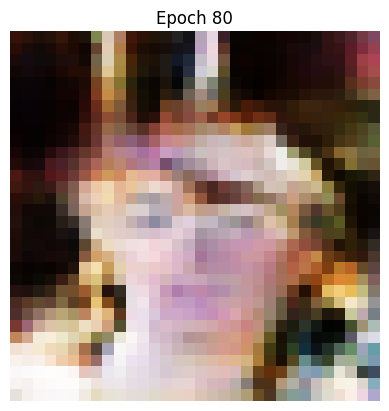

Epoch [81/100], Batch 10/156, D Loss: 0.5788, G Loss: 1.3111
Epoch [81/100], Batch 20/156, D Loss: 0.4566, G Loss: 1.5412
Epoch [81/100], Batch 30/156, D Loss: 0.5597, G Loss: 1.1685
Epoch [81/100], Batch 40/156, D Loss: 0.4003, G Loss: 1.0942
Epoch [81/100], Batch 50/156, D Loss: 0.8377, G Loss: 1.2649
Epoch [81/100], Batch 60/156, D Loss: 0.5078, G Loss: 0.9268
Epoch [81/100], Batch 70/156, D Loss: 0.6785, G Loss: 1.2927
Epoch [81/100], Batch 80/156, D Loss: 0.5978, G Loss: 1.3138
Epoch [81/100], Batch 90/156, D Loss: 0.4932, G Loss: 2.2049
Epoch [81/100], Batch 100/156, D Loss: 0.4757, G Loss: 1.4557
Epoch [81/100], Batch 110/156, D Loss: 0.4983, G Loss: 1.1173
Epoch [81/100], Batch 120/156, D Loss: 0.3215, G Loss: 1.4784
Epoch [81/100], Batch 130/156, D Loss: 0.6265, G Loss: 0.9198
Epoch [81/100], Batch 140/156, D Loss: 0.6550, G Loss: 1.1187
Epoch [81/100], Batch 150/156, D Loss: 0.7209, G Loss: 2.1834
Epoch [82/100], Batch 10/156, D Loss: 0.6302, G Loss: 1.4753
Epoch [82/100], Ba

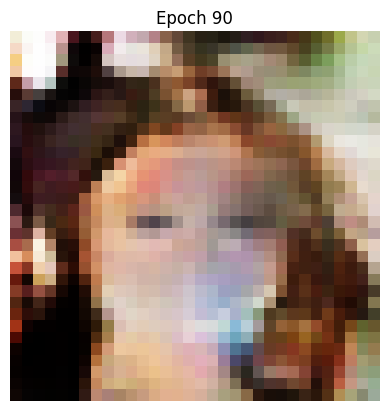

Epoch [91/100], Batch 10/156, D Loss: 0.5702, G Loss: 1.4142
Epoch [91/100], Batch 20/156, D Loss: 0.5277, G Loss: 1.1952
Epoch [91/100], Batch 30/156, D Loss: 0.5043, G Loss: 1.1544
Epoch [91/100], Batch 40/156, D Loss: 0.4772, G Loss: 1.7699
Epoch [91/100], Batch 50/156, D Loss: 0.5265, G Loss: 0.8714
Epoch [91/100], Batch 60/156, D Loss: 0.6741, G Loss: 1.1017
Epoch [91/100], Batch 70/156, D Loss: 0.5143, G Loss: 1.0859
Epoch [91/100], Batch 80/156, D Loss: 0.6160, G Loss: 1.5713
Epoch [91/100], Batch 90/156, D Loss: 0.4102, G Loss: 1.4928
Epoch [91/100], Batch 100/156, D Loss: 0.7936, G Loss: 0.8357
Epoch [91/100], Batch 110/156, D Loss: 0.6461, G Loss: 1.0650
Epoch [91/100], Batch 120/156, D Loss: 0.5301, G Loss: 1.5539
Epoch [91/100], Batch 130/156, D Loss: 0.5570, G Loss: 1.7465
Epoch [91/100], Batch 140/156, D Loss: 0.5523, G Loss: 0.7456
Epoch [91/100], Batch 150/156, D Loss: 0.7532, G Loss: 1.3512
Epoch [92/100], Batch 10/156, D Loss: 0.4964, G Loss: 1.4693
Epoch [92/100], Ba

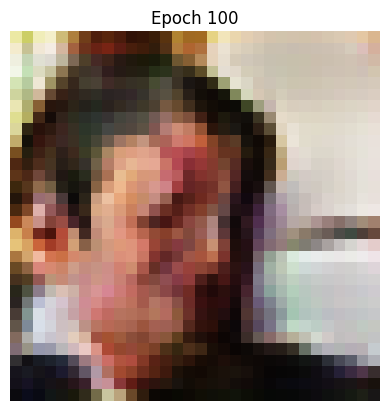

In [ ]:
for epoch in range(num_epochs):
    num_batches = len(imagess_tensor) // batch_size
    for i in range(num_batches):
        # Sample real images
        idx = np.random.randint(0, len(imagess_tensor), batch_size)
        real_images = imagess_tensor[idx].to(device)

        # Labels
        valid = torch.ones(batch_size, 1, device=device)
        fake = torch.zeros(batch_size, 1, device=device)

        # Train Discriminator
        optimizer_D.zero_grad()
        z = torch.randn(batch_size, latent_dim, device=device)
        fake_images = generator(z)
        real_loss = adversarial_loss(discriminator(real_images), valid)
        fake_loss = adversarial_loss(discriminator(fake_images.detach()), fake)
        d_loss = (real_loss + fake_loss) / 2
        d_loss.backward()
        optimizer_D.step()

        # Train Generator
        optimizer_G.zero_grad()
        gen_images = generator(z)
        g_loss = adversarial_loss(discriminator(gen_images), valid)
        g_loss.backward()
        optimizer_G.step()

        if (i + 1) % 10 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Batch {i+1}/{num_batches}, "
                  f"D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}")

    # Show generated samples
    if (epoch + 1) % 10 == 0:
      with torch.no_grad():
          z = torch.randn(1, latent_dim, device=device)  # Only one sample
          generated = generator(z).detach().cpu()[0]     # Shape: (3, 64, 64)
          image = (generated + 1) / 2                     # Rescale from [-1,1] to [0,1]

          # Convert to (H, W, C) and display
          np_img = image.numpy().transpose(1, 2, 0)
          plt.imshow(np.clip(np_img, 0, 1))  # Ensure pixel range is valid
          plt.axis("off")
          plt.title(f"Epoch {epoch + 1}")
          plt.show()


In [ ]:
discriminator
image_folder = "/content/unzipped_folder/img_align_celeba/"

image_files = sorted([
    f for f in os.listdir(image_folder)
    if f.lower().endswith(('.jpg', '.jpeg', '.png'))
])[:10000]

resized_images = []

for file_name in image_files:
    image_path = os.path.join(image_folder, file_name)
    try:
        img = Image.open(image_path).convert("RGB")
        img_resized = img.resize((128, 128))
        img_array = np.array(img_resized).astype(np.float32)  # [0, 255]
        resized_images.append(img_array)
    except Exception as e:
        print(f"Skipping {file_name}: {e}")

resized_images_np = np.array(resized_images)  # shape: (1000, 32, 32, 3)

# Convert to [0,1] → [-1,1], then to (N, 3, 32, 32)
imagesss = (resized_images_np / 127.5) - 1.0
imagesss = np.transpose(imagesss, (0, 3, 1, 2))  # to (N, C, H, W)
imagesss_tensor = torch.tensor(imagesss, dtype=torch.float32)


In [ ]:
class Generator_2(nn.Module):
    def __init__(self, latent_dim):
        super(Generator_2, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(latent_dim, 256 * 8 * 8),
            nn.ReLU(),
            nn.Unflatten(1, (256, 8, 8)),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(256, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128, momentum=0.78),
            nn.ReLU(),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128, momentum=0.78),
            nn.ReLU(),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(128, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64, momentum=0.78),
            nn.ReLU(),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(64, 3, kernel_size=3, padding=1),
            nn.Tanh()
        )

    def forward(self, z):
        return self.model(z)


In [ ]:
class Discriminator_2(nn.Module):
    def __init__(self):
        super(Discriminator_2, self).__init__()

        self.model = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=2, padding=1),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.25),
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(64, momentum=0.8),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.25),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(128, momentum=0.8),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.25),
            nn.Conv2d(128, 256, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(256, momentum=0.8),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.25),
            nn.Conv2d(256, 512, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(512, momentum=0.8),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.25),
            nn.Flatten(),
            nn.Linear(512 * 4 * 4, 1),
            nn.Sigmoid()
        )

    def forward(self, img):
        return self.model(img)


In [ ]:
generator_2 = Generator_2(100).to(device)
discriminator_2 = Discriminator_2().to(device)

adversarial_loss = nn.BCELoss()

optimizer_G = optim.Adam(generator_2.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator_2.parameters(), lr=0.0002, betas=(0.5, 0.999))

Epoch [1/100], Batch 10/156, D Loss: 0.4326, G Loss: 1.9906
Epoch [1/100], Batch 20/156, D Loss: 0.7020, G Loss: 2.5512
Epoch [1/100], Batch 30/156, D Loss: 0.6793, G Loss: 2.1369
Epoch [1/100], Batch 40/156, D Loss: 0.3615, G Loss: 2.7206
Epoch [1/100], Batch 50/156, D Loss: 0.3297, G Loss: 2.3614
Epoch [1/100], Batch 60/156, D Loss: 0.3329, G Loss: 2.8674
Epoch [1/100], Batch 70/156, D Loss: 0.3915, G Loss: 2.7896
Epoch [1/100], Batch 80/156, D Loss: 0.4675, G Loss: 2.0168
Epoch [1/100], Batch 90/156, D Loss: 0.5498, G Loss: 1.9384
Epoch [1/100], Batch 100/156, D Loss: 0.5828, G Loss: 1.5015
Epoch [1/100], Batch 110/156, D Loss: 0.4200, G Loss: 2.0965
Epoch [1/100], Batch 120/156, D Loss: 0.5277, G Loss: 1.7082
Epoch [1/100], Batch 130/156, D Loss: 0.4880, G Loss: 2.0204
Epoch [1/100], Batch 140/156, D Loss: 0.4800, G Loss: 1.8289
Epoch [1/100], Batch 150/156, D Loss: 0.4331, G Loss: 1.5338
Epoch [2/100], Batch 10/156, D Loss: 0.4690, G Loss: 1.3989
Epoch [2/100], Batch 20/156, D Los

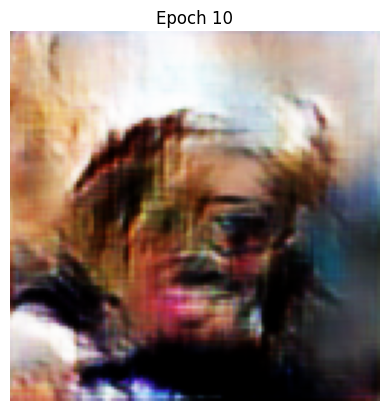

Epoch [11/100], Batch 10/156, D Loss: 0.3151, G Loss: 2.8516
Epoch [11/100], Batch 20/156, D Loss: 0.3123, G Loss: 1.7383
Epoch [11/100], Batch 30/156, D Loss: 0.3351, G Loss: 2.3804
Epoch [11/100], Batch 40/156, D Loss: 0.3753, G Loss: 1.7453
Epoch [11/100], Batch 50/156, D Loss: 0.4243, G Loss: 2.5821
Epoch [11/100], Batch 60/156, D Loss: 0.4223, G Loss: 3.0792
Epoch [11/100], Batch 70/156, D Loss: 0.3334, G Loss: 2.0514
Epoch [11/100], Batch 80/156, D Loss: 0.4062, G Loss: 3.1055
Epoch [11/100], Batch 90/156, D Loss: 0.4157, G Loss: 2.1369
Epoch [11/100], Batch 100/156, D Loss: 0.3630, G Loss: 2.1852
Epoch [11/100], Batch 110/156, D Loss: 0.4284, G Loss: 1.5462
Epoch [11/100], Batch 120/156, D Loss: 0.3029, G Loss: 2.3928
Epoch [11/100], Batch 130/156, D Loss: 0.3055, G Loss: 1.6689
Epoch [11/100], Batch 140/156, D Loss: 0.3352, G Loss: 2.1194
Epoch [11/100], Batch 150/156, D Loss: 0.2921, G Loss: 1.8810
Epoch [12/100], Batch 10/156, D Loss: 0.3260, G Loss: 1.8436
Epoch [12/100], Ba

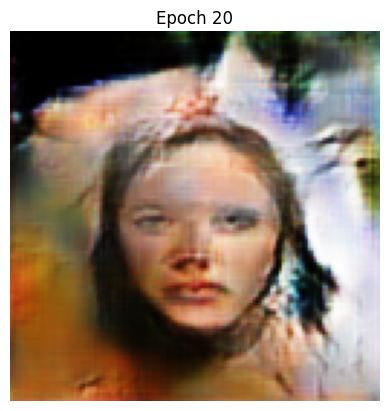

Epoch [21/100], Batch 10/156, D Loss: 0.2567, G Loss: 2.5861
Epoch [21/100], Batch 20/156, D Loss: 0.4334, G Loss: 2.9240
Epoch [21/100], Batch 30/156, D Loss: 0.4269, G Loss: 1.7692
Epoch [21/100], Batch 40/156, D Loss: 0.3267, G Loss: 2.5127
Epoch [21/100], Batch 50/156, D Loss: 0.2503, G Loss: 1.6994
Epoch [21/100], Batch 60/156, D Loss: 0.2415, G Loss: 3.6211
Epoch [21/100], Batch 70/156, D Loss: 0.4179, G Loss: 1.2498
Epoch [21/100], Batch 80/156, D Loss: 0.2638, G Loss: 2.9884
Epoch [21/100], Batch 90/156, D Loss: 0.2976, G Loss: 2.3046
Epoch [21/100], Batch 100/156, D Loss: 0.2504, G Loss: 1.9577
Epoch [21/100], Batch 110/156, D Loss: 0.2824, G Loss: 2.3575
Epoch [21/100], Batch 120/156, D Loss: 0.3084, G Loss: 2.5210
Epoch [21/100], Batch 130/156, D Loss: 0.5849, G Loss: 4.2147
Epoch [21/100], Batch 140/156, D Loss: 0.3866, G Loss: 1.6675
Epoch [21/100], Batch 150/156, D Loss: 0.3375, G Loss: 2.3972
Epoch [22/100], Batch 10/156, D Loss: 0.3284, G Loss: 3.1457
Epoch [22/100], Ba

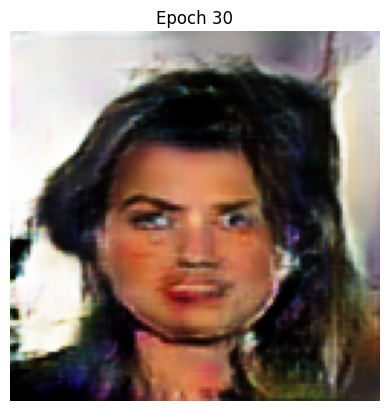

Epoch [31/100], Batch 10/156, D Loss: 0.3637, G Loss: 2.2430
Epoch [31/100], Batch 20/156, D Loss: 0.3048, G Loss: 1.9516
Epoch [31/100], Batch 30/156, D Loss: 0.2780, G Loss: 2.8684
Epoch [31/100], Batch 40/156, D Loss: 0.3103, G Loss: 2.1773
Epoch [31/100], Batch 50/156, D Loss: 0.2711, G Loss: 2.1602
Epoch [31/100], Batch 60/156, D Loss: 0.5248, G Loss: 4.0284
Epoch [31/100], Batch 70/156, D Loss: 0.2640, G Loss: 2.7963
Epoch [31/100], Batch 80/156, D Loss: 0.2823, G Loss: 2.0469
Epoch [31/100], Batch 90/156, D Loss: 0.3719, G Loss: 1.7925
Epoch [31/100], Batch 100/156, D Loss: 0.2172, G Loss: 2.6846
Epoch [31/100], Batch 110/156, D Loss: 0.2081, G Loss: 2.7252
Epoch [31/100], Batch 120/156, D Loss: 0.2886, G Loss: 3.4901
Epoch [31/100], Batch 130/156, D Loss: 0.4120, G Loss: 1.0256
Epoch [31/100], Batch 140/156, D Loss: 0.2613, G Loss: 2.0792
Epoch [31/100], Batch 150/156, D Loss: 0.2150, G Loss: 3.7353
Epoch [32/100], Batch 10/156, D Loss: 0.2720, G Loss: 1.6990
Epoch [32/100], Ba

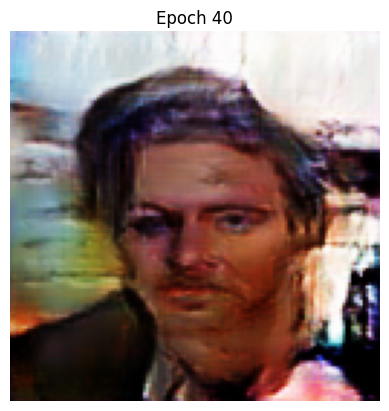

Epoch [41/100], Batch 10/156, D Loss: 0.2921, G Loss: 2.4443
Epoch [41/100], Batch 20/156, D Loss: 0.2450, G Loss: 3.0180
Epoch [41/100], Batch 30/156, D Loss: 0.3669, G Loss: 2.5748
Epoch [41/100], Batch 40/156, D Loss: 0.1732, G Loss: 3.3473
Epoch [41/100], Batch 50/156, D Loss: 0.5130, G Loss: 1.3527
Epoch [41/100], Batch 60/156, D Loss: 0.3103, G Loss: 1.7582
Epoch [41/100], Batch 70/156, D Loss: 0.2343, G Loss: 2.7914
Epoch [41/100], Batch 80/156, D Loss: 0.3495, G Loss: 3.9198
Epoch [41/100], Batch 90/156, D Loss: 0.2289, G Loss: 2.6108
Epoch [41/100], Batch 100/156, D Loss: 0.1936, G Loss: 2.8857
Epoch [41/100], Batch 110/156, D Loss: 0.2272, G Loss: 3.4015
Epoch [41/100], Batch 120/156, D Loss: 0.3069, G Loss: 3.1279
Epoch [41/100], Batch 130/156, D Loss: 0.2242, G Loss: 3.4920
Epoch [41/100], Batch 140/156, D Loss: 0.4633, G Loss: 3.9804
Epoch [41/100], Batch 150/156, D Loss: 0.4188, G Loss: 1.8723
Epoch [42/100], Batch 10/156, D Loss: 0.1926, G Loss: 2.4982
Epoch [42/100], Ba

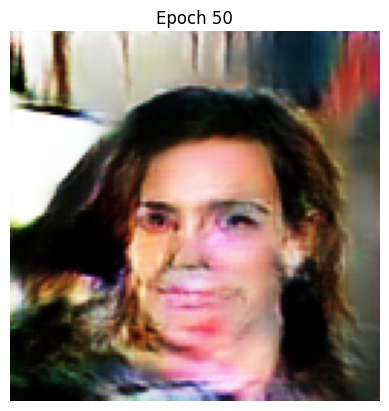

Epoch [51/100], Batch 10/156, D Loss: 0.4852, G Loss: 5.1776
Epoch [51/100], Batch 20/156, D Loss: 0.1824, G Loss: 3.5541
Epoch [51/100], Batch 30/156, D Loss: 0.3306, G Loss: 3.5859
Epoch [51/100], Batch 40/156, D Loss: 0.4864, G Loss: 1.2314
Epoch [51/100], Batch 50/156, D Loss: 0.1739, G Loss: 3.2265
Epoch [51/100], Batch 60/156, D Loss: 0.2384, G Loss: 2.9090
Epoch [51/100], Batch 70/156, D Loss: 0.1883, G Loss: 3.9536
Epoch [51/100], Batch 80/156, D Loss: 0.1399, G Loss: 2.1840
Epoch [51/100], Batch 90/156, D Loss: 0.3944, G Loss: 4.6055
Epoch [51/100], Batch 100/156, D Loss: 0.1946, G Loss: 3.1724
Epoch [51/100], Batch 110/156, D Loss: 0.2744, G Loss: 2.8719
Epoch [51/100], Batch 120/156, D Loss: 0.1533, G Loss: 3.1558
Epoch [51/100], Batch 130/156, D Loss: 0.2912, G Loss: 4.4770
Epoch [51/100], Batch 140/156, D Loss: 0.3025, G Loss: 2.4654
Epoch [51/100], Batch 150/156, D Loss: 0.2499, G Loss: 3.0892
Epoch [52/100], Batch 10/156, D Loss: 0.2537, G Loss: 1.7734
Epoch [52/100], Ba

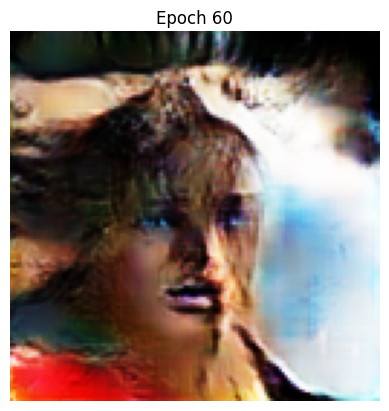

Epoch [61/100], Batch 10/156, D Loss: 0.1434, G Loss: 3.6613
Epoch [61/100], Batch 20/156, D Loss: 0.1354, G Loss: 3.6038
Epoch [61/100], Batch 30/156, D Loss: 0.1238, G Loss: 4.2286
Epoch [61/100], Batch 40/156, D Loss: 0.1777, G Loss: 3.1304
Epoch [61/100], Batch 50/156, D Loss: 0.2501, G Loss: 2.9906
Epoch [61/100], Batch 60/156, D Loss: 0.2169, G Loss: 1.7399
Epoch [61/100], Batch 70/156, D Loss: 0.3554, G Loss: 2.2136
Epoch [61/100], Batch 80/156, D Loss: 0.2137, G Loss: 2.8609
Epoch [61/100], Batch 90/156, D Loss: 0.3300, G Loss: 3.2424
Epoch [61/100], Batch 100/156, D Loss: 0.1736, G Loss: 4.3132
Epoch [61/100], Batch 110/156, D Loss: 0.3188, G Loss: 4.5536
Epoch [61/100], Batch 120/156, D Loss: 0.1341, G Loss: 3.6838
Epoch [61/100], Batch 130/156, D Loss: 0.2710, G Loss: 1.8366
Epoch [61/100], Batch 140/156, D Loss: 0.3505, G Loss: 3.7373
Epoch [61/100], Batch 150/156, D Loss: 0.2624, G Loss: 4.6394
Epoch [62/100], Batch 10/156, D Loss: 0.2910, G Loss: 3.6277
Epoch [62/100], Ba

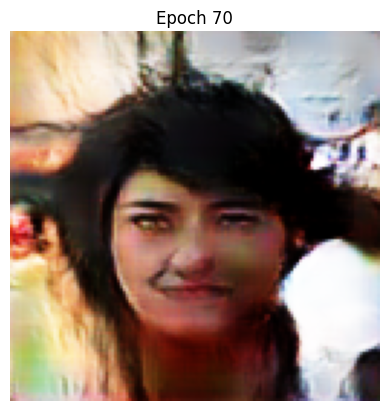

Epoch [71/100], Batch 10/156, D Loss: 0.2217, G Loss: 2.7999
Epoch [71/100], Batch 20/156, D Loss: 0.2269, G Loss: 3.3687
Epoch [71/100], Batch 30/156, D Loss: 0.1588, G Loss: 2.1825
Epoch [71/100], Batch 40/156, D Loss: 0.2457, G Loss: 3.4052
Epoch [71/100], Batch 50/156, D Loss: 0.2270, G Loss: 1.8539
Epoch [71/100], Batch 60/156, D Loss: 0.1057, G Loss: 4.2303
Epoch [71/100], Batch 70/156, D Loss: 0.2772, G Loss: 3.0498
Epoch [71/100], Batch 80/156, D Loss: 0.2474, G Loss: 1.5179
Epoch [71/100], Batch 90/156, D Loss: 0.2081, G Loss: 3.3099
Epoch [71/100], Batch 100/156, D Loss: 0.1490, G Loss: 2.9353
Epoch [71/100], Batch 110/156, D Loss: 0.1613, G Loss: 2.6491
Epoch [71/100], Batch 120/156, D Loss: 0.3317, G Loss: 4.2878
Epoch [71/100], Batch 130/156, D Loss: 0.2114, G Loss: 3.3691
Epoch [71/100], Batch 140/156, D Loss: 0.2325, G Loss: 4.5807
Epoch [71/100], Batch 150/156, D Loss: 0.1261, G Loss: 4.7159
Epoch [72/100], Batch 10/156, D Loss: 0.1318, G Loss: 3.2005
Epoch [72/100], Ba

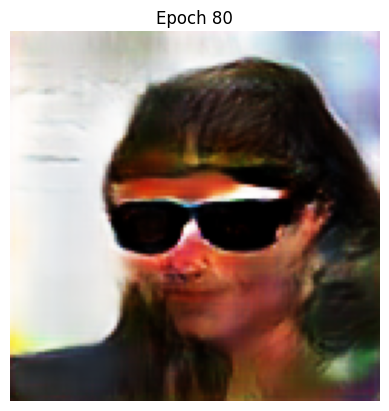

Epoch [81/100], Batch 10/156, D Loss: 0.1214, G Loss: 4.2069
Epoch [81/100], Batch 20/156, D Loss: 0.1710, G Loss: 3.7310
Epoch [81/100], Batch 30/156, D Loss: 0.1821, G Loss: 3.5546
Epoch [81/100], Batch 40/156, D Loss: 0.2085, G Loss: 4.6124
Epoch [81/100], Batch 50/156, D Loss: 0.2798, G Loss: 3.7923
Epoch [81/100], Batch 60/156, D Loss: 0.1395, G Loss: 3.9281
Epoch [81/100], Batch 70/156, D Loss: 0.1360, G Loss: 4.0542
Epoch [81/100], Batch 80/156, D Loss: 0.1204, G Loss: 3.5941
Epoch [81/100], Batch 90/156, D Loss: 0.1422, G Loss: 4.5360
Epoch [81/100], Batch 100/156, D Loss: 0.1089, G Loss: 4.4072
Epoch [81/100], Batch 110/156, D Loss: 0.6144, G Loss: 6.7439
Epoch [81/100], Batch 120/156, D Loss: 0.2402, G Loss: 2.8096
Epoch [81/100], Batch 130/156, D Loss: 0.1389, G Loss: 3.2024
Epoch [81/100], Batch 140/156, D Loss: 0.1482, G Loss: 4.3467
Epoch [81/100], Batch 150/156, D Loss: 0.3015, G Loss: 2.6703
Epoch [82/100], Batch 10/156, D Loss: 0.2337, G Loss: 2.5268
Epoch [82/100], Ba

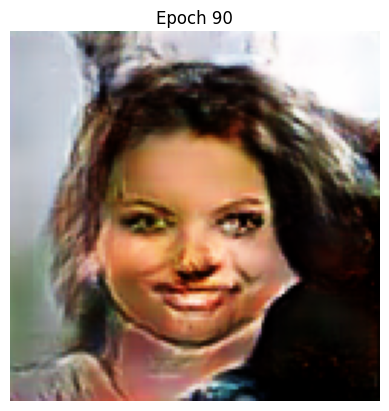

Epoch [91/100], Batch 10/156, D Loss: 0.1961, G Loss: 4.6368
Epoch [91/100], Batch 20/156, D Loss: 0.2426, G Loss: 3.0830
Epoch [91/100], Batch 30/156, D Loss: 0.1598, G Loss: 4.6235
Epoch [91/100], Batch 40/156, D Loss: 0.2058, G Loss: 3.7900
Epoch [91/100], Batch 50/156, D Loss: 0.1346, G Loss: 3.2618
Epoch [91/100], Batch 60/156, D Loss: 0.1260, G Loss: 4.0059
Epoch [91/100], Batch 70/156, D Loss: 0.1521, G Loss: 4.0366
Epoch [91/100], Batch 80/156, D Loss: 0.2788, G Loss: 5.2025
Epoch [91/100], Batch 90/156, D Loss: 0.1013, G Loss: 4.3434
Epoch [91/100], Batch 100/156, D Loss: 0.1514, G Loss: 3.2082
Epoch [91/100], Batch 110/156, D Loss: 0.1146, G Loss: 3.8403
Epoch [91/100], Batch 120/156, D Loss: 0.1030, G Loss: 4.3060
Epoch [91/100], Batch 130/156, D Loss: 0.3953, G Loss: 2.1181
Epoch [91/100], Batch 140/156, D Loss: 0.1140, G Loss: 3.4839
Epoch [91/100], Batch 150/156, D Loss: 0.1728, G Loss: 3.5802
Epoch [92/100], Batch 10/156, D Loss: 0.1578, G Loss: 4.2399
Epoch [92/100], Ba

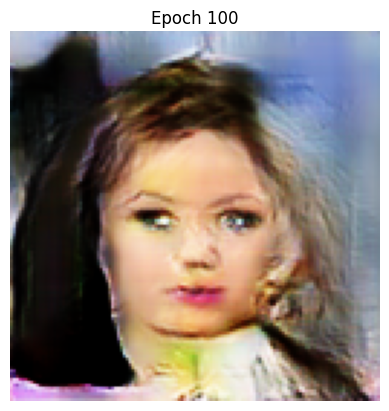

In [ ]:
for epoch in range(num_epochs):
    num_batches = len(imagesss_tensor) // batch_size
    for i in range(num_batches):

        idx = np.random.randint(0, len(imagesss_tensor), batch_size)
        real_images = imagesss_tensor[idx].to(device)

        valid = torch.ones(batch_size, 1, device=device)
        fake = torch.zeros(batch_size, 1, device=device)

        # Train Discriminator
        optimizer_D.zero_grad()
        z = torch.randn(batch_size, latent_dim, device=device)
        fake_images = generator_2(z)
        real_loss = adversarial_loss(discriminator_2(real_images), valid)
        fake_loss = adversarial_loss(discriminator_2(fake_images.detach()), fake)
        d_loss = (real_loss + fake_loss) / 2
        d_loss.backward()
        optimizer_D.step()

        # Train Generator
        optimizer_G.zero_grad()
        gen_images = generator_2(z)
        g_loss = adversarial_loss(discriminator_2(gen_images), valid)
        g_loss.backward()
        optimizer_G.step()

        if (i + 1) % 10 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Batch {i+1}/{num_batches}, "
                  f"D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}")
    #For displaying image
    if (epoch + 1) % 10 == 0:
      with torch.no_grad():
          z = torch.randn(1, latent_dim, device=device)
          generated = generator_2(z).detach().cpu()[0]
          image = (generated + 1) / 2
          np_img = image.numpy().transpose(1, 2, 0)
          plt.imshow(np.clip(np_img, 0, 1))
          plt.axis("off")
          plt.title(f"Epoch {epoch + 1}")
          plt.show()


In [ ]:
generator_2.eval()

# ---- Generate Images ----
with torch.no_grad():
    z = torch.randn(16, latent_dim).to(device)
    generated_images = generator_2(z).cpu()
    generated_images = (generated_images + 1) / 2  # [-1,1] to [0,1]

# ---- Display One Image ----
img = generated_images[0].permute(1, 2, 0).numpy()  # (H, W, C)
plt.imshow(img)
plt.axis("off")
plt.title("Generated Image")
plt.show()

In [ ]:
imagess.shape

(1000, 3072)